In [160]:
import numpy as np
import pandas as pd

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [146]:
# load data
def loadData(filename):
    data = pd.read_csv(filename)
    data['Time'] = pd.to_datetime(data.Time)
    return data

# data fusion takes previous 12h ours in 30min resolution
# prediction generates 8 days x 24 hours/day x 2 values/hour = 384 values
def generateFeatureVectorsAndTargets(data):
    X = []
    y = []
    for i in range(0, len(data) - 408):
        # extract hour of day from datetime64
        # hour = data.iloc[5:6, 0].dt.hour.values[0]
        # extract day of the week from datetime64
        day = data.iloc[5:6, 0].dt.dayofweek.values[0]

        X.append(np.concatenate((np.array(data.iloc[i:i+24, 1]), [hour, day])))
        y.append(np.array(data.iloc[i+24:i+408, 1]))
    return np.array(X).tolist(), np.array(y).tolist()

In [147]:
# clear feature vectors with missing data
def clearFeatureVectors(X, y):
    X_clean = []
    y_clean = []
    for i in range(0, len(X)):
        if not np.isnan(X[i]).any() and not np.isnan(y[i]).any():
            X_clean.append(X[i])
            y_clean.append(y[i])
            
    return np.array(X_clean), np.array(y_clean)

In [148]:
# load data
data = loadData('../../data/DataForModels/UnivariateClean/GoodValuesDiputacion.csv')
# create feature vectors
X, y = generateFeatureVectorsAndTargets(data)
X, y = clearFeatureVectors(X, y)

In [149]:
# create train and test set
X_train = X[:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]
y_train = y[:int(len(y)*0.8)]
y_test = y[int(len(y)*0.8):]

In [150]:
# data fusion takes previous 12h ours in 30min resolution
# prediction generates 8 days x 24 hours/day x 2 values/hour = 384 values
regressor = MultiOutputRegressor(GradientBoostingRegressor(random_state=0), n_jobs=6)

# train model
regressor.fit(X_train, y_train)


MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=0),
                     n_jobs=6)

In [161]:
# data fusion takes previous 12h ours in 30min resolution
# prediction generates 8 days x 24 hours/day x 2 values/hour = 384 values
regressor = MultiOutputRegressor(RandomForestRegressor(random_state=0), n_jobs=6)

# train model
regressor.fit(X_train, y_train)

In [152]:
# evaluate multioutput regressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# evaluate model
y_pred = regressor.predict(X_test)

# calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [151]:
# no day/time
[r2, mse, mae]

[0.5330879143157355, 373.8080396092866, 13.46218565342352]

In [153]:
# with day/time
[r2, mse, mae]

[0.5330888762229136, 373.8072770621637, 13.461765700187199]

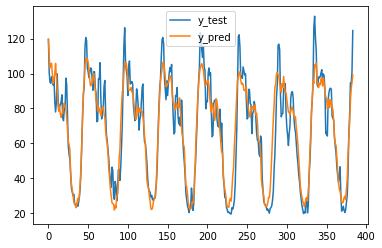

In [159]:
# plot results
import matplotlib.pyplot as plt

# %% 
# plot results
plt.plot(y_test[1300], label='y_test')
plt.plot(y_pred[1300], label='y_pred')
plt.legend()
plt.show()
